## Dataset Link: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?resource=download

## Impoarting Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Data Preprocessing

### Training image preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation="bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


### Validation image preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation="bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


## Building Model

In [10]:
cnn = tf.keras.models.Sequential()

### Building convolution layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same',activation='relu',input_shape=[64, 64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

C:\Users\Ds-Lab\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu',input_shape=[64, 64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [20]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

## Compile and training phase

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
training_history = cnn.fit(x=training_set, validation_data = validation_set, epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 240ms/step - accuracy: 0.0287 - loss: 18.7288 - val_accuracy: 0.0342 - val_loss: 3.5818
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.0348 - loss: 3.5812 - val_accuracy: 0.0484 - val_loss: 3.5632
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.0462 - loss: 3.5772 - val_accuracy: 0.0513 - val_loss: 3.5437
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.0407 - loss: 3.5538 - val_accuracy: 0.0769 - val_loss: 3.5188
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.0599 - loss: 3.5315 - val_accuracy: 0.0883 - val_loss: 3.4221
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.0617 - loss: 3.4972 - val_accuracy: 0.1054 - val_loss: 3.4005
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.0675 - loss: 3.4830 - val_accuracy: 0.1425 - val_loss: 3.3623
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.0910 - loss: 3.3856 - val_acc

## Evaluating Model

In [44]:
# trining set accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training Accuracy: ', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.8306 - loss: 0.6047
Training Accuracy:  0.8452648520469666


In [46]:
# validation set accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation Accuracy: ',val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8032 - loss: 0.8111
Validation Accuracy:  0.8176637887954712


## Saving Model

In [49]:
cnn.save('trained_model.h5')

In [51]:
training_history.history

{'accuracy': [0.02921348251402378,
  0.03723916411399841,
  0.04077046364545822,
  0.04141252115368843,
  0.05778491124510765,
  0.05906902253627777,
  0.06484751403331757,
  0.09502407908439636,
  0.11171749234199524,
  0.14767254889011383,
  0.19197431206703186,
  0.22696629166603088,
  0.3101123571395874,
  0.3444622755050659,
  0.39229533076286316,
  0.4414125084877014,
  0.4905296862125397,
  0.5258427262306213,
  0.5762439966201782,
  0.5910112261772156,
  0.6150882840156555,
  0.6404494643211365,
  0.6516854166984558,
  0.6844301819801331,
  0.707223117351532,
  0.7117174863815308,
  0.7335473299026489,
  0.74093097448349,
  0.7499197721481323,
  0.7617977261543274,
  0.7701444625854492,
  0.7858747839927673],
 'loss': [7.344753265380859,
  3.5792202949523926,
  3.5723752975463867,
  3.5531692504882812,
  3.5211591720581055,
  3.4920921325683594,
  3.47176456451416,
  3.392193555831909,
  3.281797409057617,
  3.125643014907837,
  2.962024211883545,
  2.7795817852020264,
  2.5277

In [55]:
# recording history in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [60]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Calculating Accuracy

In [62]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 81.76637887954712 %


## Accuracy Visualization

### Testing Visualization

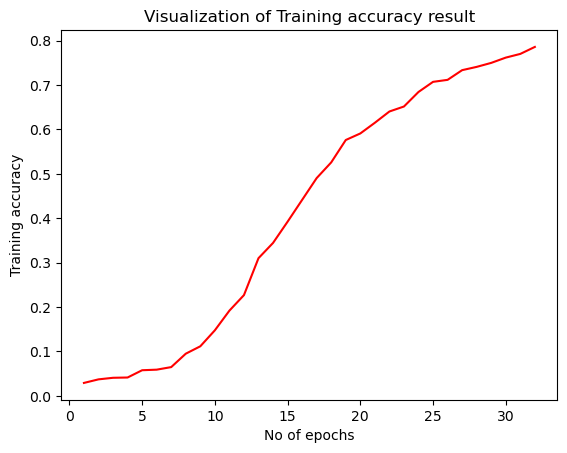

In [65]:
epochs = [i for i in range(1, 33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No of epochs')
plt.ylabel('Training accuracy')
plt.title('Visualization of Training accuracy result')
plt.show()

### Validation Accuracy

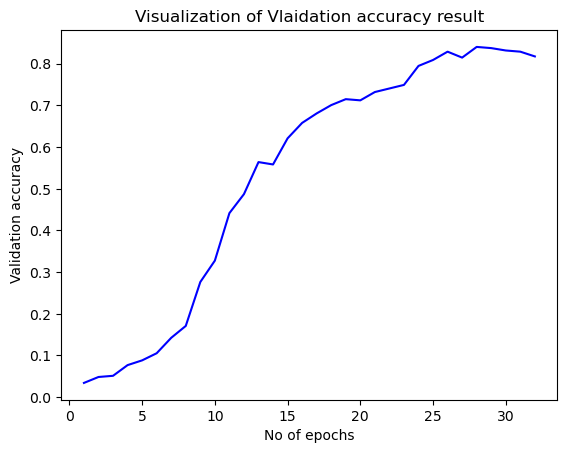

In [71]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No of epochs')
plt.ylabel('Validation accuracy')
plt.title('Visualization of Vlaidation accuracy result')
plt.show()

## Test set Evaluation

In [74]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation="bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


In [76]:
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy: ', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.8137 - loss: 0.7334
Test accuracy:  0.8217270374298096
